# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
print(weather_api_key)

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

b712f197ae5c98c74165521abb951cef


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | severo-yeniseyskiy
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | nova vicosa
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | harnai
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | santa cruz
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | st. john's
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | sandnessjoen
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | yuzhno-kurilsk
Processing Record 20 of Set 1 | lata
Processing Record 21 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 22 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,26.99,83,75,5.66,CC,1735510758
1,severo-yeniseyskiy,60.3725,93.0408,-9.34,93,100,3.69,RU,1735510760
2,iqaluit,63.7506,-68.5145,-25.50,84,4,1.23,CA,1735510761
3,grytviken,-54.2811,-36.5092,2.98,72,15,2.75,GS,1735510762
4,avarua,-21.2078,-159.7750,29.03,84,40,5.66,CK,1735510514


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,26.99,83,75,5.66,CC,1735510758
1,severo-yeniseyskiy,60.3725,93.0408,-9.34,93,100,3.69,RU,1735510760
2,iqaluit,63.7506,-68.5145,-25.50,84,4,1.23,CA,1735510761
3,grytviken,-54.2811,-36.5092,2.98,72,15,2.75,GS,1735510762
4,avarua,-21.2078,-159.7750,29.03,84,40,5.66,CK,1735510514


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

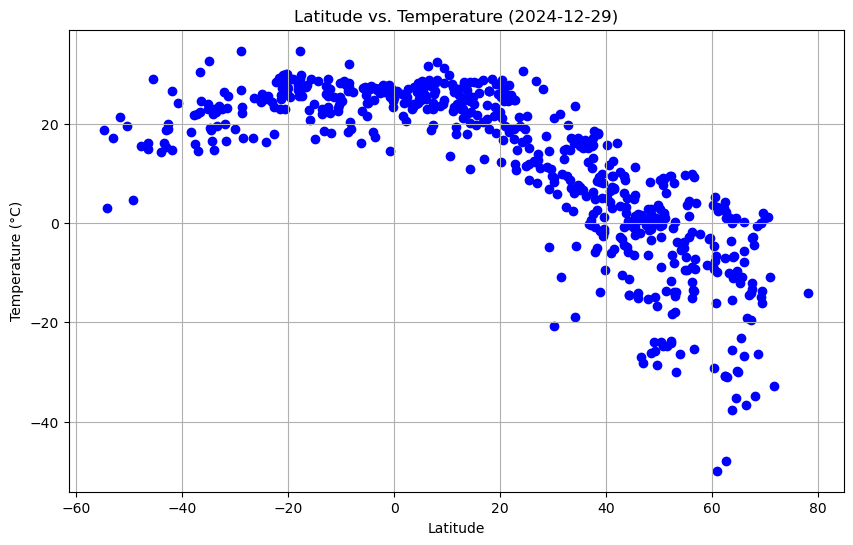

<Figure size 640x480 with 0 Axes>

In [14]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', color='blue')
plt.title('Latitude vs. Temperature (%s)' % time.strftime ("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

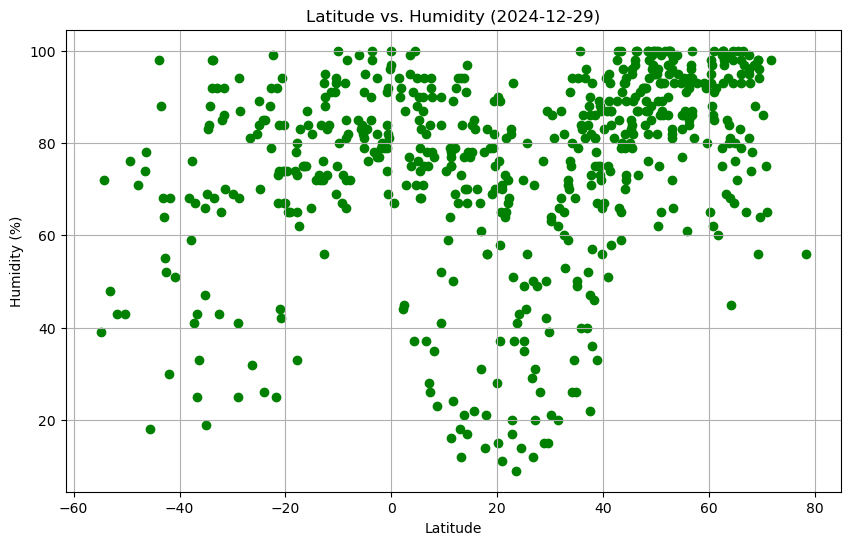

<Figure size 640x480 with 0 Axes>

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', color='green')
plt.title('Latitude vs. Humidity (%s)' % time.strftime ("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

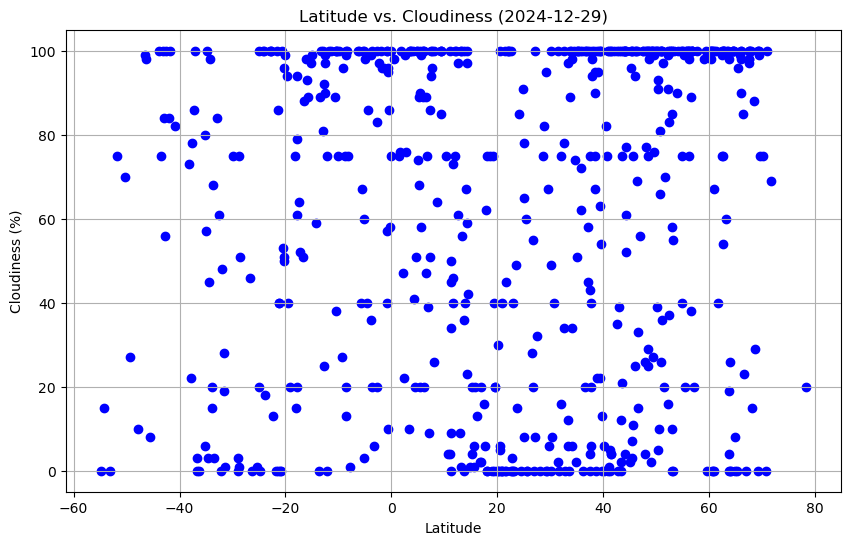

<Figure size 640x480 with 0 Axes>

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', color='blue')
plt.title('Latitude vs. Cloudiness (%s)' % time.strftime ("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

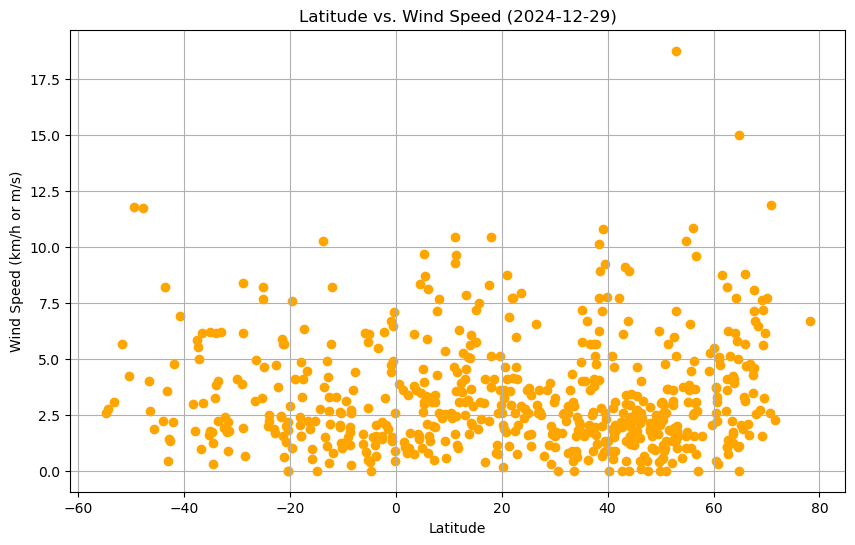

<Figure size 640x480 with 0 Axes>

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', color='orange')
plt.title('Latitude vs. Wind Speed (%s)' % time.strftime ("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h or m/s)')
plt.grid(True)
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope * + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Create the plot
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")

    # Show the plot
    plt.show()


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
north_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,severo-yeniseyskiy,60.3725,93.0408,-9.34,93,100,3.69,RU,1735510760
2,iqaluit,63.7506,-68.5145,-25.50,84,4,1.23,CA,1735510761
6,jamestown,42.0970,-79.2353,16.12,81,100,7.72,US,1735510503
9,udachny,66.4167,112.4000,-36.77,100,85,2.09,RU,1735510769
10,harnai,30.1005,67.9374,8.96,21,49,1.07,PK,1735510770


In [24]:
min_values = north_hemi_df.min()
print(min_values)

City             aasiaat
Lat               0.5333
Lng             -159.378
Max Temp          -49.91
Humidity               9
Cloudiness             0
Wind Speed           0.0
Country               AF
Date          1735510503
dtype: object


In [28]:
max_values = north_hemi_df.max()
print(max_values)

City            zouerate
Lat              78.2186
Lng             177.4833
Max Temp           32.35
Humidity             100
Cloudiness           100
Wind Speed         18.78
Country               YE
Date          1735511527
dtype: object


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,26.99,83,75,5.66,CC,1735510758
3,grytviken,-54.2811,-36.5092,2.98,72,15,2.75,GS,1735510762
4,avarua,-21.2078,-159.7750,29.03,84,40,5.66,CK,1735510514
5,nova vicosa,-17.8919,-39.3719,25.64,80,79,4.84,BR,1735510764
7,adamstown,-25.0660,-130.1015,24.34,84,100,7.68,PN,1735510766


###  Temperature vs. Latitude Linear Regression Plot

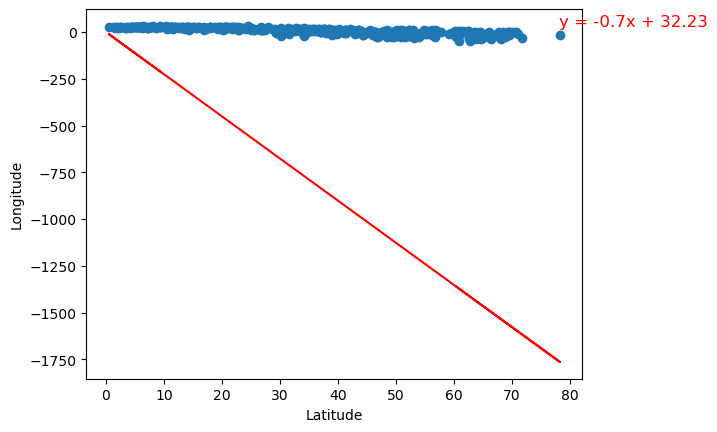

In [50]:
# Linear regression on Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (78,32))

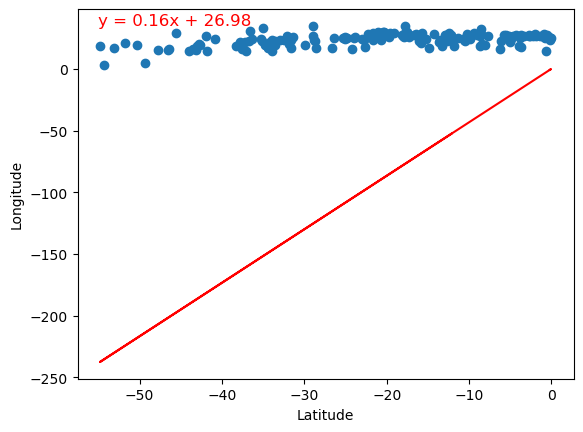

In [52]:
# Linear regression on Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The linear relationship shows that there are a lot of ouliers within this dataset.

### Humidity vs. Latitude Linear Regression Plot

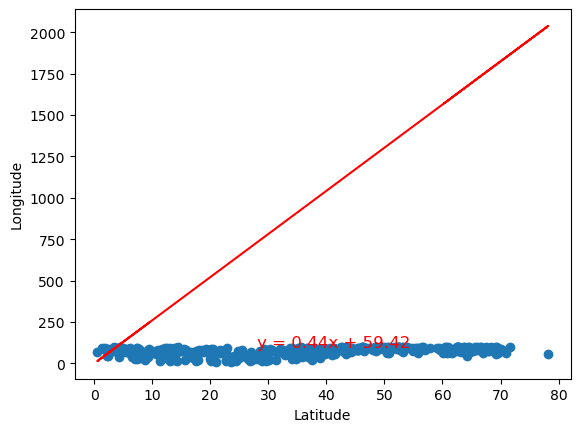

In [56]:
# Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (28, 98))

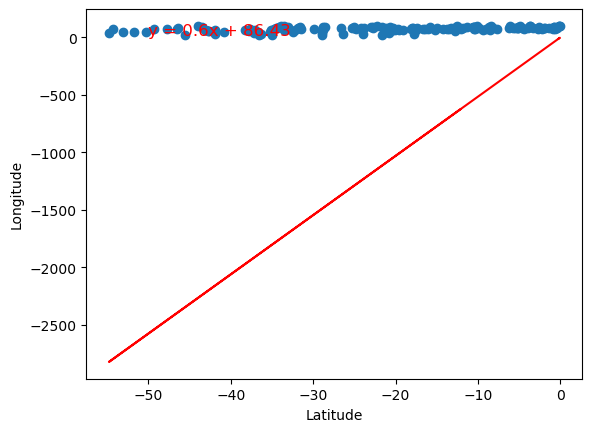

In [58]:
# Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The linear relationship shows the data points closely aligned with the linear trend.

### Cloudiness vs. Latitude Linear Regression Plot

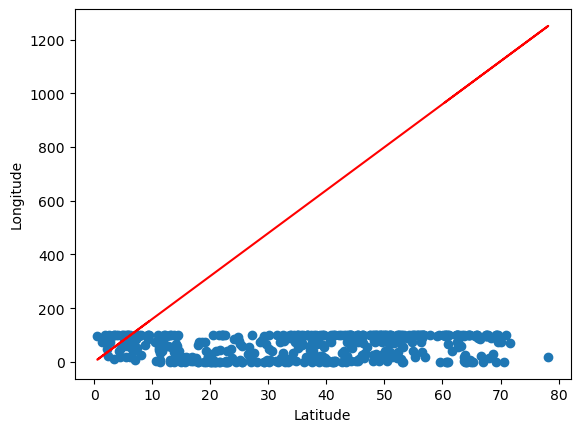

In [62]:
# Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-65, 30))

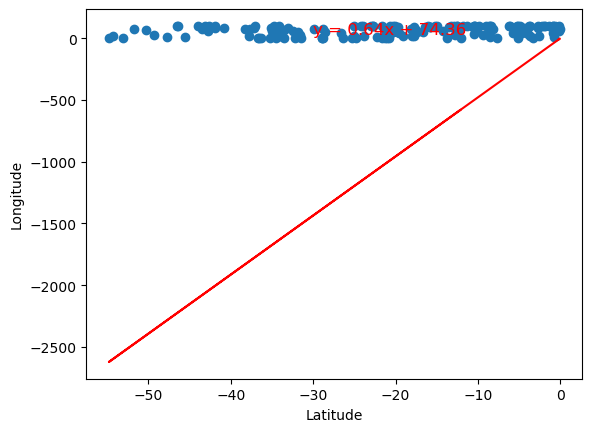

In [64]:
# Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The linear relationship shows the data points closely aligned with the linear trend.

### Wind Speed vs. Latitude Linear Regression Plot

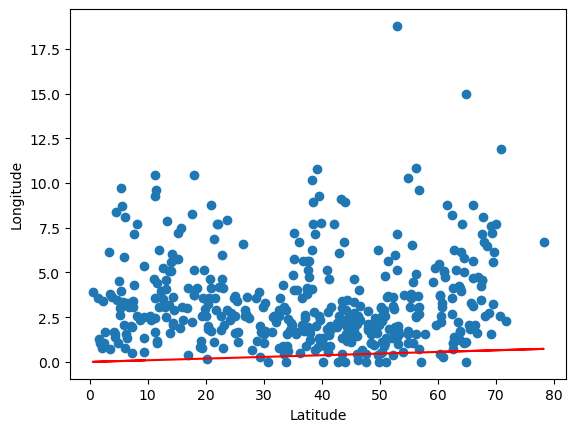

In [68]:
# Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-40, 16))

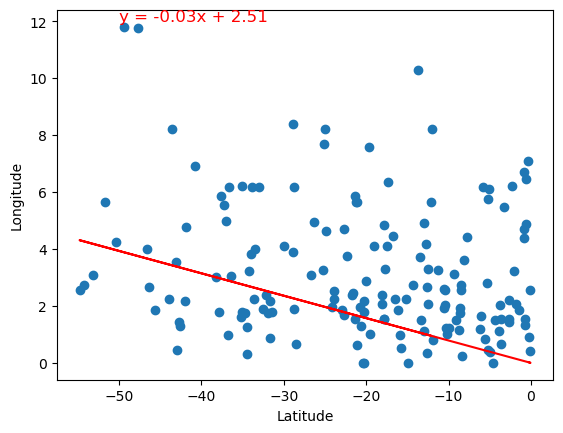

In [70]:
# Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The linear relationship does not exhibit a clear linear trend.